In [1]:
images_path = "/home/michal/projects/nasa/data/full_train/full/img"

from datasets import load_dataset

# Load images into a Hugging Face dataset
dataset = load_dataset("imagefolder", data_dir=images_path)
dataset = dataset["train"]  # access the split
print(dataset)

/home/michal/miniconda3/envs/nasa/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['image'],
    num_rows: 15050
})


In [4]:
images = [img.convert("RGB") for img in dataset["image"]]


PIL.Image.Image

In [5]:
type(images[0])

PIL.Image.Image

In [13]:


import numpy as np
import argparse
import cv2
from PIL import Image
import numpy

def adjust_gamma(image, gamma=10.0):
    pil_image = image.convert('RGB')
    open_cv_image = numpy.array(pil_image)
    # build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
    return cv2.LUT(open_cv_image, table)

adj = adjust_gamma(images[0])

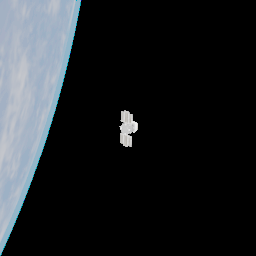

In [14]:
im = Image.fromarray(adj)
im